<div style="direction:ltr;line-height:100%;background-color:white;border-radius: 25px;">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/1200px-University_of_Tehran_logo.svg.png" alt="UT logo" width="130" height="130" align="left" style="padding-top: 15px; padding-left: 90px;">
    <img src="https://i.ibb.co/wLjqFkw/logo2.png" alt="Eng logo" width="170" height="130" align="right" style="padding-top: 15px; padding-right: 90px;">
    <div align="center" style="position: relative;">
      <font color=#1A5276 size = 5.7px>
                <br>
                <b> Dynamic Programming HO - Fall 2024 </b>
                <br>
                <br>
      </font>
      <font color=#1A5276 size = 3px>
                <br>
                <b> Interactive Learning Course</b>
                <br>
      </font>
      <font color=#1A5276 size = 2.9px>
                <br>
                <a href="https://ece.ut.ac.ir/">School of Electrical & Computer Engineering</a>, <a href="https://eng.ut.ac.ir/fa">College of Engineering</a>, <a href="https://ut.ac.ir/">University of Tehran
                <br>
      </font>
      </br>
      <font color=#1A5276>
               <br>
               <b>Prepared by:</b> <a href="mailto:fardinabbasi1381@gmail.com" class="email-link">Fardin Abbasi</a>
      </font>
    </div>
</div>

---
## Introduction
This notebook covers two fundamental **dynamic programming** algorithms to solve MDPs namely **Value Iteration** and **Policy Iteration**.

**Dynamic Programming (DP)**

Dynamic Programming (DP) refers to a **collection of methods** that compute optimal policies. A key condition for using DP effectively is **<span style="color:#f31818">having a perfect model of the environment</span>** — in other words, full knowledge of how the environment operates.

**Assumptions**

Consider an environment represented as a finite **Markov Decision Process (MDP)**, with:

- **State Set**: $\mathscr{S}$
- **Action Set** (based on state): $ \mathscr{A}(s)$
- **Reward Set**: $\mathscr{R}$
- **Transition Dynamics**: probabilities $p(s', r | s, a)$
- **Discount Factor**: $\gamma$ (where $0 \leq \gamma \leq 1$), which determines the importance of **future** rewards. A higher $\gamma$ values future rewards more, whereas a lower $\gamma$ places more emphasis on **immediate** rewards.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*NN51R1dMMTewFDxL.png" width="400" style="display: block; margin-left: auto; margin-right: auto;">

---

In [1]:
from src.gridworld import GridWorld

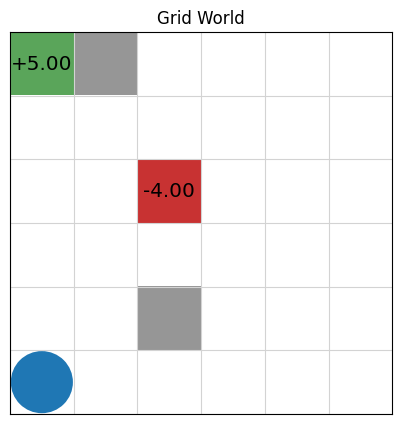

In [2]:
gridworld = GridWorld(noise=0.1, width=6, height=6, discount_factor=0.9, blocked_states=[(1, 5),(2,1)], 
                      action_cost=0.1, initial_state=(0, 0), goals=[((0, 5), 5), ((2, 3), -4)])
fig = gridworld.visualise(title="Grid World", grid_size=0.7)

# The noise parameter controls action failures in GridWorld, so that when the agent selects an action, 
# it will fail with probability noise. When noise==0.0, the action will always be successful.

---
## Policy Iteration
* Policy Iteration alternates between two steps: policy evaluation and policy improvement.

    * **Policy Evaluation**: Given a policy, evaluate its value function by iteratively applying the **Bellman expectation equation** until convergence.

    * **Policy Improvement**: Once the value function has converged, update the policy to be greedy with respect to the current value function.
    
<img src="https://i.sstatic.net/kKZx7.png" width="500" style="display: block; margin-left: auto; margin-right: auto;">

**Complete** *policy_iteration.py*.

---

In [3]:
from src.policy_iteration import PolicyIteration
from src.tabular_policy import TabularPolicy

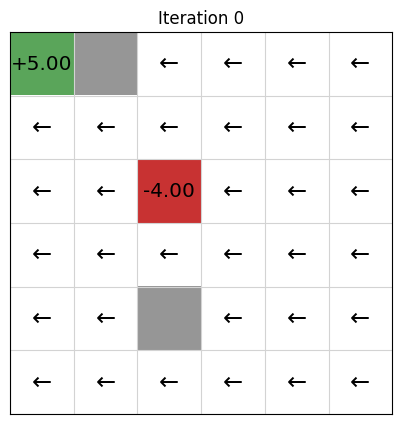

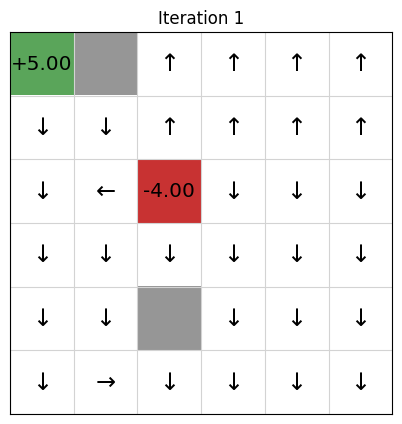

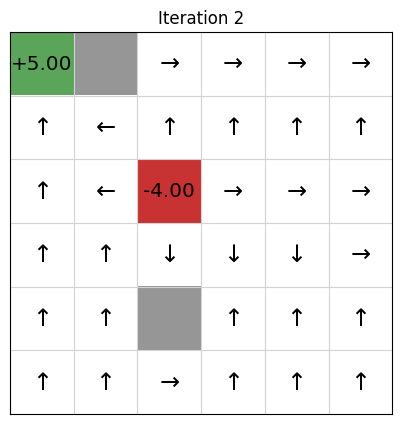

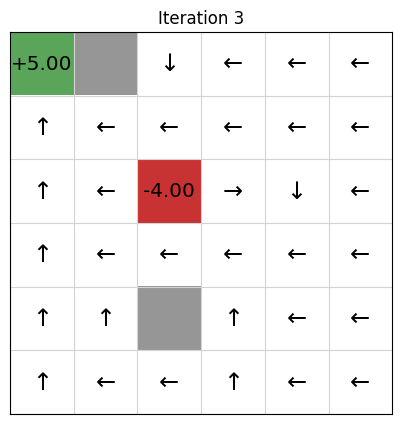

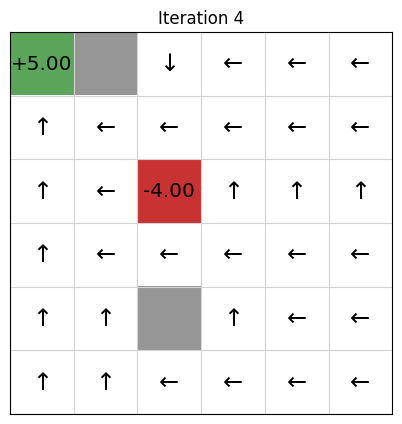

In [4]:
policy = TabularPolicy(default_action=gridworld.LEFT)
"""
# The following loop is equivalent to:
PolicyIteration(gridworld, policy).policy_iteration(max_iterations=100)
"""
max_iter = 5
for iterations in range(0, max_iter):
    title = "Iteration %d" % (iterations)
    gridworld.visualise_policy(policy, title=title, grid_size=0.7)
    PolicyIteration(gridworld, policy).policy_iteration(max_iterations=1)

---
## Value Iteration
Value Iteration is an algorithm used in reinforcement learning to find the optimal policy for a Markov Decision Process (MDP). It iteratively updates the value of each state using the **Bellman optimality equation** until the values converge to the optimal values. Once the optimal value function $V^*$ is obtained, the optimal policy $\pi^*$ can be derived.

<img src="https://raw.githubusercontent.com/alokwhitewolf/Reinforcement-Learning/322f89d85400482ca7bcce90d71effe6f8c9181b/Sutton-Book/ch-04/images/valueiteration.png" width="600" style="display: block; margin-left: auto; margin-right: auto;">

**Complete** *value_iteration.py*.

---

In [5]:
from src.value_iteration import ValueIteration
from src.tabular_value_function import TabularValueFunction
from src.value_policy import ValuePolicy

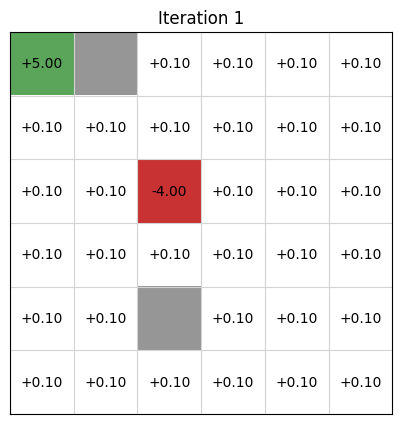

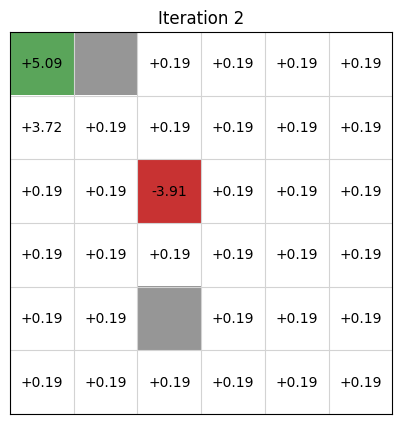

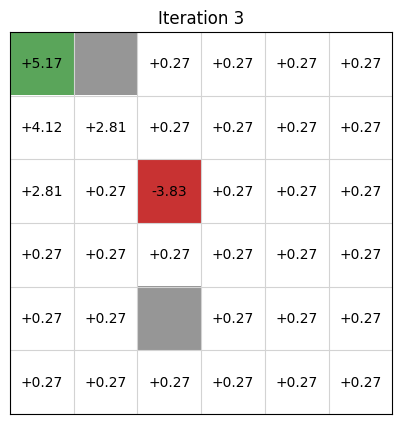

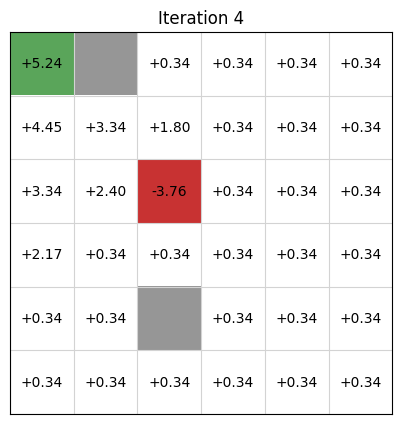

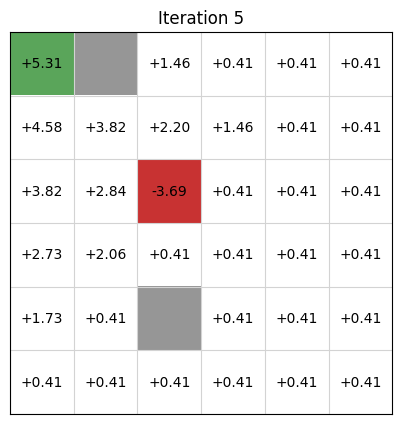

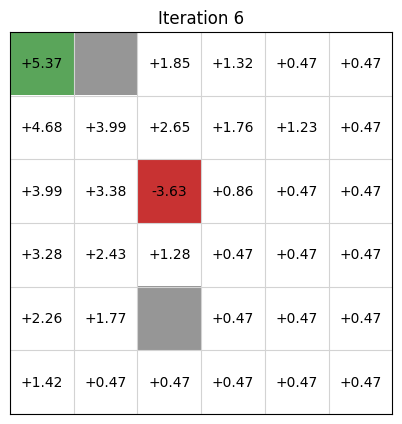

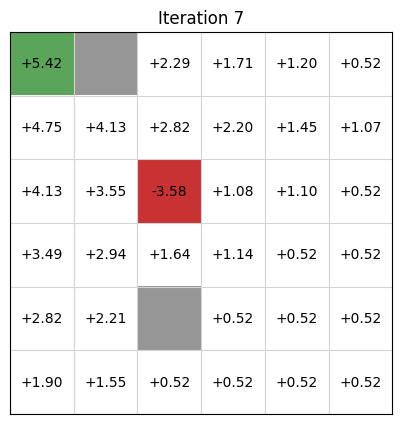

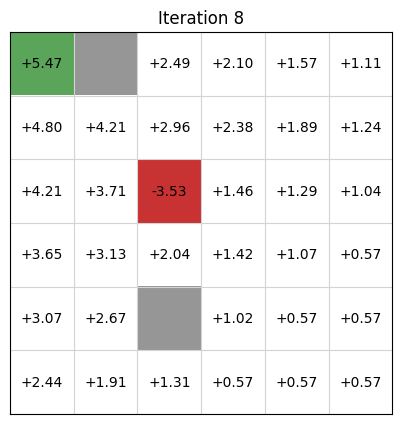

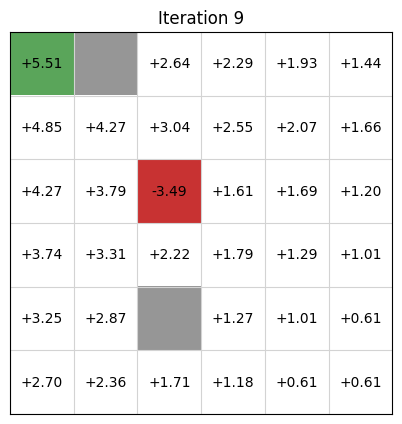

In [6]:
values = TabularValueFunction()
"""
# The following loop is equivalent to:
ValueIteration(gridworld, values).value_iteration(max_iterations=100)
"""
max_iter = 10
for iterations in range(1, max_iter):
    ValueIteration(gridworld, values).value_iteration(max_iterations=1)
    title = "Iteration %d" % (iterations)
    gridworld.visualise_value_function(values, title=title, grid_size=0.7)

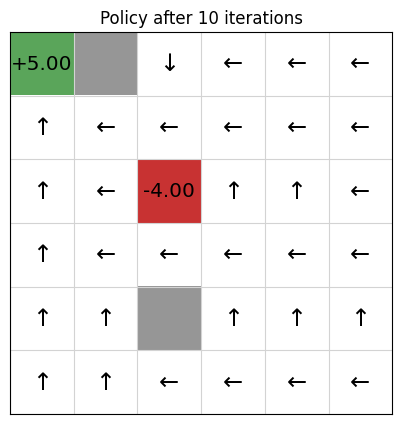

In [7]:
policy = ValuePolicy(gridworld, values)
gridworld.visualise_policy(policy, f"Policy after {max_iter} iterations", grid_size=0.7)

### Evaluating Policies
We can see the improvement that value iteration has on each iteration by extracting the policy after each iteration, running the policy on the GridWorld, and plotting the cumulative reward that is received. We run value iteration on GridWorld for 1 iteration, but 50 times, using the same value function each time, meaning the the value iteration algorithm will update the value function. After each iteration, we extract the policy and execute the policy for 1 episode, recording the cumulative reward that was received.

In [8]:
from src.stochastic_value_policy import StochasticValuePolicy
from src.utils.plot import Plot

In [9]:
values = TabularValueFunction()
policy = StochasticValuePolicy(gridworld, values)
rewards = gridworld.execute_policy(policy, episodes=1)
for _ in range(50):
    ValueIteration(gridworld, values).value_iteration(max_iterations=1)
    policy = StochasticValuePolicy(gridworld, values)
    rewards += gridworld.execute_policy(policy, episodes=1)

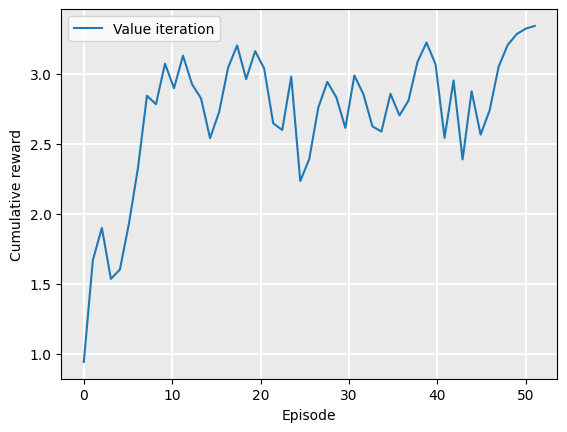

In [10]:
Plot.plot_cumulative_rewards(["Value iteration"], [rewards], smoothing_factor=0.5)

## Have Fun :)

In [11]:
import os

In [ ]:
maze_path = os.path.join("src", "layouts", "maze.txt")

maze = GridWorld.open(maze_path)
fig = maze.visualise(title="Grid World")
# ...

---

## Read More: Continuous Dynamics

- *GitHub - nicoRomeroCuruchet/DynamicProgramming: **Policy Iteration for Continuous Dynamics***.  
  [View on GitHub](https://github.com/nicoRomeroCuruchet/DynamicProgramming)

- ***Economic Applications** of Continuous Time Dynamic Programming (1/3): A Cake Eating Problem*.  
  [Watch on YouTube](https://www.youtube.com/watch?v=1CQwvijuF8s)

---


---

## Read More: **Good Practices** in Python Programming

- *Shukla, U. Best Python Coding practices: Writing clean and efficient code. [Medium](https://medium.com/@utkarshshukla.author/best-python-coding-practices-writing-clean-and-efficient-code-4784946a17d0)*.

- *A guide of best practices to developing in Python. (n.d.). [Gist](https://gist.github.com/ruimaranhao/4e18cbe3dad6f68040c32ed6709090a3)*.

- *Sachal, A. Python: Production-Level Coding Practices - Red Buffer - [Medium](https://medium.com/red-buffer/python-production-level-coding-practices-4c39246e0233).*.

---

---

## References
* *Sutton, R. S., & Barto, A. G. (2018). Reinforcement Learning, second edition: An Introduction. MIT Press.*
* *Uonliaquat. (n.d.). GitHub - uonliaquat/RL_Visualizer: A visualization tool for policy iteration and value iteration. [GitHub](https://github.com/uonliaquat/RL_Visualizer).*
* *Thakur, A. Policy iteration and value iteration in reinforcement learning. [LinkedIn](https://www.linkedin.com/pulse/policy-iteration-value-reinforcement-learning-arastu-thakur-ovmjc/)*
* *Contents — Mastering reinforcement learning. (n.d.). [GitHub](https://gibberblot.github.io/rl-notes/)*
* *Policy and Value Iteration Algorithms | DeepRL. (n.d.). [GitBook](https://mandi-zhao.gitbook.io/deeprl-notes/value-based-methods-1/value-based-methods)*

---